In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("~/Statistical-Learning/data/prostate_cancer.csv")
data = data.drop('Unnamed: 0', axis = 1)

In [3]:
data.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


# 3.3.1 Best-Subset Selection

Best subset regression finds for each k ∈ {0, 1, 2, . . . , p} the subset of size k that gives smallest residual sum of squares

In [4]:
data_x = data.drop(['lpsa','train'], axis=1)

In [5]:
data_x_normalized = (data_x - data_x.mean())/data_x.std()

In [11]:
x_train = data_x_normalized[data.train=='T']
y_train = data[data.train=='T'].lpsa
x_train.shape

(67, 8)

In [31]:
def ols_rss(subset):
    sub_x_train = x_train.loc[:,subset]
    mat_x = np.hstack((np.ones((len(sub_x_train.values), 1)), sub_x_train.values))
    mat_xt = np.transpose(mat_x)
    ols_beta = np.linalg.solve(np.matmul(mat_xt, mat_x), np.matmul(mat_xt, y_train.values))
    y_train_ols = np.matmul(mat_x, ols_beta)
    rss = sum((y_train_ols - y_train)**2)
    return rss

In [16]:
import itertools

In [27]:
column_combinations = itertools.combinations(x_train.columns, 8)
for subset in column_combinations:
    print(subset)

('lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45')


In [13]:
rss_dict = {}

In [34]:
for k in range(x_train.shape[1]+1): # When k=0, select constant only.
    rss_list = []
    column_combinations = itertools.combinations(x_train.columns, k)
    for subset in column_combinations:
        rss = ols_rss(subset)
        rss_list.append(rss)
    rss_dict[k] = rss_list

### Plot

In [36]:
import matplotlib.pyplot as plt

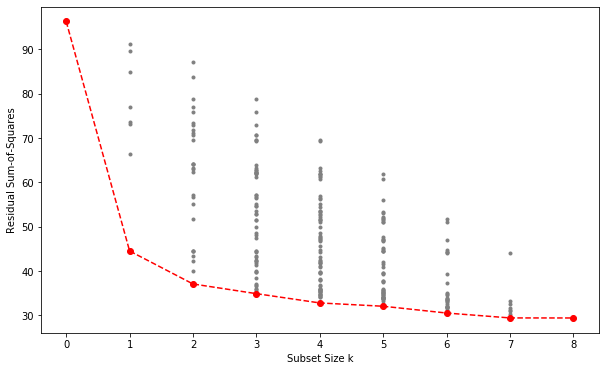

In [51]:
fig1 = plt.figure(figsize=(10,6))
fig1.clear()
ax = fig1.add_subplot(1,1,1)
min_rss_list = []
for key, value in rss_dict.items():
    for rss in value:
        ax.plot(key, rss, 'o', color='gray', markersize=3)
    min_rss_list.append(min(value))
ax.plot(range(len(rss_dict.keys())), min_rss_list, 'o--', color='red') 
ax.set_xlabel('Subset Size k')
ax.set_ylabel('Residual Sum-of-Squares')
plt.show()

The lower boundary represents the models that are eligible for selection by the best-subsets approach. Note that the best subset of size 2, for example, need not include the variable that was in the best subset of size 1 (for this example all the subsets are nested). The best-subset curve (red lower boundary in Figure 3.5) is necessarily decreasing, so cannot be used to select the subset size k.


# 3.3.2 Forward- and Backward-Stepwise Selection

## Foward

Advantage: <br>
• Computational; for large p we cannot compute the best subset sequence, but we can always compute the forward stepwise sequence (even when p ≫ N). <br>
• Statistical; a price is paid in variance for selecting the best subset of each size; forward stepwise is a more constrained search, and will have lower variance, but perhaps more bias.

In [73]:
def forward_stepwise(x_train, y_train):
    fstep_dict={}
    subset = []
    fstep_x_train = x_train.copy()
    rss = ols_rss(subset)
    fstep_dict[0] = rss
    for k in range(x_train.shape[1]):
        print("k:", k+1)
        rss_k = []
        for i in range(fstep_x_train.shape[1]):
            subset_k = subset.copy()
            subset_k.append(fstep_x_train.columns[i])
            print("subset_k:", subset_k)
            rss_i = ols_rss(subset_k)
            rss_k.append(rss_i)
        print("rss_k:", rss_k)
        rss = min(rss_k)
        j = rss_k.index(rss)
        subset.append(fstep_x_train.columns[j])
        fstep_x_train = fstep_x_train.drop(fstep_x_train.columns[j], axis=1)
        print("subset:", subset)
        fstep_dict[len(subset)] = rss
    return fstep_dict
    

In [91]:
fstep_dict = forward_stepwise(x_train, y_train)
fstep_dict

k: 1
subset_k: ['lcavol']
subset_k: ['lweight']
subset_k: ['age']
subset_k: ['lbph']
subset_k: ['svi']
subset_k: ['lcp']
subset_k: ['gleason']
subset_k: ['pgg45']
rss_k: [44.52858265645383, 73.61354018577536, 91.29203902075545, 89.62491208245952, 66.42240272124413, 73.23939131621877, 84.99179045937804, 76.95323667726328]
subset: ['lcavol']
k: 2
subset_k: ['lcavol', 'lweight']
subset_k: ['lcavol', 'age']
subset_k: ['lcavol', 'lbph']
subset_k: ['lcavol', 'svi']
subset_k: ['lcavol', 'lcp']
subset_k: ['lcavol', 'gleason']
subset_k: ['lcavol', 'pgg45']
rss_k: [37.091845632561345, 44.49564216406745, 39.99230435121233, 42.312584301379616, 44.46756799853183, 44.42407814925553, 43.423103787681725]
subset: ['lcavol', 'lweight']
k: 3
subset_k: ['lcavol', 'lweight', 'age']
subset_k: ['lcavol', 'lweight', 'lbph']
subset_k: ['lcavol', 'lweight', 'svi']
subset_k: ['lcavol', 'lweight', 'lcp']
subset_k: ['lcavol', 'lweight', 'gleason']
subset_k: ['lcavol', 'lweight', 'pgg45']
rss_k: [36.81722941600001,

{0: 96.28144501815153,
 1: 44.52858265645383,
 2: 37.091845632561345,
 3: 34.907748856567856,
 4: 32.81499474881554,
 5: 32.069447332331784,
 6: 30.539778129147365,
 7: 29.437300317417083,
 8: 29.426384459908412}

## Backward

Backward selection can only be used when **N > p**, while forward stepwise can always be used.

In [92]:
def backward_stepwise(x_train, y_train):
    fstep_dict={}
    subset = list(x_train.columns)
    fstep_x_train = x_train.copy()
    
    for k in range(x_train.shape[1]):
        print("k:", len(subset))
        print("subset:", subset)
        rss = ols_rss(subset)
        fstep_dict[len(subset)] = rss
        rss_k = []
        for i in range(len(subset)):
            subset_k = subset.copy()
            subset_k.remove(subset_k[i])
            print("subset_k:", subset_k)
            rss_i = ols_rss(subset_k)
            rss_k.append(rss_i)
        print("rss_k:", rss_k)
        rss = min(rss_k)
        j = rss_k.index(rss)
        subset.remove(subset[j])
    
    fstep_dict[0] = rss
    
    return fstep_dict
    

In [93]:
bstep_dict = backward_stepwise(x_train, y_train)
bstep_dict

k: 8
subset: ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
subset_k: ['lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
subset_k: ['lcavol', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
subset_k: ['lcavol', 'lweight', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
subset_k: ['lcavol', 'lweight', 'age', 'svi', 'lcp', 'gleason', 'pgg45']
subset_k: ['lcavol', 'lweight', 'age', 'lbph', 'lcp', 'gleason', 'pgg45']
subset_k: ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'gleason', 'pgg45']
subset_k: ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'pgg45']
subset_k: ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason']
rss_k: [44.03662151270498, 33.26543290315887, 30.414990170034592, 31.57070601748839, 32.51981848057306, 31.19468834590385, 29.437300317417083, 30.958629941880638]
k: 7
subset: ['lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'pgg45']
subset_k: ['lweight', 'age', 'lbph', 'svi', 'lcp', 'pgg45']
subset_k: ['lcavol', 'age', 'lbph', 'svi',

{8: 29.426384459908398,
 7: 29.437300317417083,
 6: 30.53977812914736,
 5: 32.06944733233178,
 4: 32.81499474881555,
 3: 34.907748856567856,
 2: 37.091845632561345,
 1: 44.52858265645383,
 0: 96.28144501815153}

In [106]:
min_rss_list

[96.28144501815153,
 44.52858265645383,
 37.091845632561345,
 34.907748856567856,
 32.81499474881555,
 32.06944733233178,
 30.53977812914736,
 29.437300317417083,
 29.426384459908398]

The dataset is too small, so these three results are identical.

# Foward-Stagewise

It starts like forward-stepwise regression, with an intercept equal to y ̄, and centered predictors with coefficients initially all 0. At each step the algorithm identifies the variable most correlated with the current residual. It then computes the simple linear regression coefficient of the residual on this chosen variable, and then adds it to the current coefficient for that variable. This is continued till none of the variables have correlation with the residuals—i.e. the least-squares fit when N > p.

As a consequence, forward stagewise can take many more than p steps to reach the least squares fit, and historically has been dismissed as being inefficient. It turns out that this “slow fitting” can pay dividends in high-dimensional problems.

Forward-stagewise regression is included in Figure 3.6. In this example it takes over 1000 steps to get all the correlations below 10^-4.

# 3.3.4 Select k by 10-fold CV & "one-standard-error" rule

Often a “one-standard-error” rule is used with cross-validation, in which we choose the most parsimonious model whose error is no more than one standard error above the error of the best model.

### Construct N-fold

In [184]:
x_train = data_x_normalized[data.train=='T']
y_train = data[data.train=='T'].lpsa
x_train.shape

(67, 8)

In [116]:
m=67
n=5
for i in range(0,m,int(m/n)):
    print(i)

0
13
26
39
52
65


In [224]:
def n_fold_cv(n, x_train, y_train):
    cv_rss = []
    m_rows = x_train.shape[0]
    for i in range(0, m_rows-int(m_rows/n), int(m_rows/n)):
#         print(i)
        x_cv_val = x_train.iloc[i:i+int(m_rows/n), :]
        x_cv_train = x_train.iloc[:i,:].append(x_train.iloc[i+int(m_rows/n):,:])
        y_cv_val = y_train.iloc[i:i+int(m_rows/n)]
        y_cv_train = y_train.iloc[:i].append(y_train.iloc[i+int(m_rows/n):])
#         print("val vs train:", (len(y_cv_val), len(y_cv_train)))
        mat_x = np.hstack((np.ones((len(x_cv_train.values), 1)), x_cv_train.values))
        mat_xt = np.transpose(mat_x)
#         print(mat_x.shape)
        ols_beta = np.linalg.solve(np.matmul(mat_xt, mat_x), np.matmul(mat_xt, y_cv_train.values))
        mat_x_val = np.hstack((np.ones((len(x_cv_val.values), 1)), x_cv_val.values))
#         y_cv_train_ols = np.matmul(mat_x, ols_beta)
#         print(y_cv_train_ols)
        y_cv_val_ols = np.matmul(mat_x_val, ols_beta)
#         print(y_cv_val_ols)
        rss = sum((y_cv_val_ols - y_cv_val)**2)/len(y_cv_val)
#         print(rss)
        cv_rss.append(rss)
    return cv_rss
    
    
    

In [236]:
cv_rss = n_fold_cv(10, x_train, y_train)
cv_rss

[1.8006430829790006,
 0.6722459990636772,
 0.2983164423545364,
 0.3456233354413912,
 1.7560720212359706,
 0.7080805685524205,
 0.12908789235742613,
 0.6991743112133365,
 0.39531770482794576,
 0.5782048279992614,
 0.3780985092146798]

In [238]:
cv_mean = np.mean(cv_rss)
cv_std = np.std(cv_rss)
print("mean:", cv_mean)
print("std:", cv_std)
print("standard error:", cv_std/np.sqrt(10))

mean: 0.7055331541126951
std: 0.5352452172542753
standard error: 0.16925939932351655


### Select best subset of size K

In [208]:
cv_result_dict = {}
best_subset_list = []
for k in range(x_train.shape[1]+1): # When k=0, select constant only.
    cv_mean_list = []
    cv_std_list = []
    comb_list = []
    column_combinations = itertools.combinations(x_train.columns, k)
    for subset in column_combinations:
        comb_list.append(subset)
        sub_x_train = x_train.loc[:,subset]
        cv_rss = n_fold_cv(10, sub_x_train, y_train)
        cv_mean = np.mean(cv_rss)
        cv_std = np.std(cv_rss)
        cv_mean_list.append(cv_mean)
        cv_std_list.append(cv_std)
    best_mean = min(cv_mean_list)
    best_index = cv_mean_list.index(best_mean)
    best_std = cv_std_list[best_index]
    best_subset = comb_list[best_index]
    best_subset_list.append(best_subset)
    cv_result_dict[k] = [best_mean, best_std]

In [210]:
best_subset_list

[(),
 ('lcavol',),
 ('lcavol', 'lweight'),
 ('lcavol', 'lweight', 'age'),
 ('lcavol', 'lweight', 'age', 'gleason'),
 ('lcavol', 'lweight', 'age', 'lbph', 'pgg45'),
 ('lcavol', 'lweight', 'age', 'lbph', 'lcp', 'pgg45'),
 ('lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'pgg45'),
 ('lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45')]

In [211]:
cv_result_dict

{0: [1.5867789378660617, 2.0593770668907543],
 1: [0.7847837999623859, 0.5984141577562598],
 2: [0.6683302294306919, 0.4312311557787881],
 3: [0.671660382508508, 0.4484820823207442],
 4: [0.6729378229809378, 0.40411706410496856],
 5: [0.6730276171325018, 0.3799148184187523],
 6: [0.6764255304844208, 0.3517423631741355],
 7: [0.6644740714674865, 0.49499667555984117],
 8: [0.7055331541126951, 0.5352452172542753]}

In [239]:
cv_mean_result = np.array([x[0] for x in list(cv_result_dict.values())])
cv_std_result = np.array([x[1] for x in list(cv_result_dict.values())])
cv_ste_result = cv_std_result/np.sqrt(10)

In [240]:
cv_ste_result

array([0.65123221, 0.18923517, 0.13636727, 0.14182249, 0.12779304,
       0.12013961, 0.1112307 , 0.15653169, 0.1692594 ])

In [241]:
cv_upper = cv_mean_result+cv_ste_result
cv_lower = cv_mean_result-cv_ste_result
print(cv_upper)
print(cv_lower)

[2.23801115 0.97401897 0.80469749 0.81348287 0.80073086 0.79316723
 0.78765623 0.82100576 0.87479255]
[0.93554673 0.59554863 0.53196296 0.5298379  0.54514479 0.552888
 0.56519483 0.50794238 0.53627375]


In [245]:
best_cv_mean = min(cv_mean_result)
index = list(cv_mean_result).index(best_cv_mean)
one_standard_error_bound = cv_upper[index]

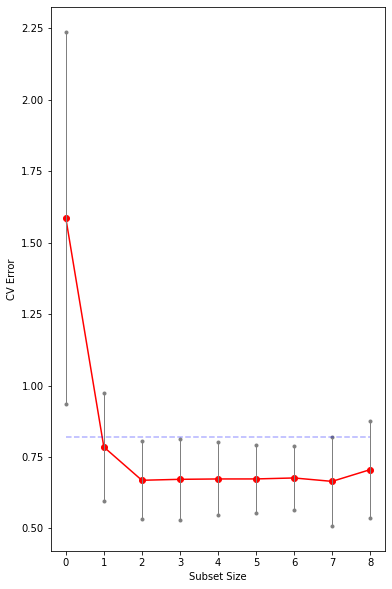

In [248]:
fig3 = plt.figure(figsize=(6,10))
fig3.clear()
ax = fig3.add_subplot(1,1,1)
ax.plot(list(cv_result_dict.keys()), cv_mean_result, 'o-', color='red')
for k in list(cv_result_dict.keys()):
    ax.plot([k,k], [cv_upper[k], cv_lower[k]], '.-', color='gray', linewidth=1)
ax.plot([0,8], [one_standard_error_bound,one_standard_error_bound], '--', color='blue', alpha=0.3)
ax.set_xlabel("Subset Size")
ax.set_ylabel("CV Error")
plt.show()
    

Here the model size 1 is chosen, according to the best subset selection, the model contains only 'lcavol'.